# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [6]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns



### Understanding the structure of the data

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
0# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [9]:
#display the whole data from using shape function from pandas api
df.shape

(1898, 9)



#### Observations:
#### The shape function will return a vector displaying how many rows and columnns that dataframe as 'df' of the csv file that was read, ie: (row, col) format.  so the returned data is (1898, 9).  There are 1898 rows and 9 Columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [10]:
display(df)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [11]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [12]:
#dtypes function can return each data type of all the 9 existing columns
df.dtypes

,0
order_id,int64
customer_id,int64
restaurant_name,object
cuisine_type,object
cost_of_the_order,float64
day_of_the_week,object
rating,object
food_preparation_time,int64
delivery_time,int64


In [13]:
# We can organize this further using the value_counts function, to catorgoize the columns
# into 64-bit integer, if its an object or a 64-bit floating point #.

df.dtypes.value_counts()

,count
int64,4
object,4
float64,1


In [14]:

df.dtypes.value_counts()

,count
int64,4
object,4
float64,1


#### Observations: The numerical data of the header objects of order_id, customer_id, cuisine_id,food_prepertion_time delivery time are all integer values. The header objects of restaurant_name cuisine_type, day_of_the_week, and rating are bjects, with exception of missing data.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [15]:
# we can check if the dataframe has any missing values by using the isnuull abnd sumfunction

df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
They are no missing data values in the dataframe. Appending the sum function to is null tells the user that all the entries in the dataframe is populated.
Thus returning a 0 for each column x row value to be 0.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [16]:

# by using the describe function we can display all the statistacal data for the dataframe.
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: food to be prepared has mininum, average, and maximum time is 20, 27.37, 25  repsectively


Question 5: How many orders are not rated?





---



In [17]:
# using value counts function with loc slicing we can find how many orders are not rated ie: Not given
df.loc[:,'rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


There are 736 orders that are not rated


#### Observations:
The above code gives information such as the majority of the food places habve not given there rating; 736 food places. There are no ratings below a 3 rating, without the consideration of Not given ratings, which could change the data disfavorably or favorably.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [18]:
# Use display function to output the whole dataframe to the screen.
display(df)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [19]:
#Analyzing the the total number of orders in the dataframe.
num_of_orders = df["order_id"].value_counts().sum()
print("The total count of orders based on the order_id column label is", num_of_orders, "orders")


The total count of orders based on the order_id column label is 1898 orders


In [20]:
#Analyzing the total number of restaurants based by name.
num_of_restaurants = df["restaurant_name"].value_counts().sum()
print("The total count of restaurants based on the restaurant_name columnn label is", num_of_restaurants, "restaurants")


The total count of restaurants based on the restaurant_name columnn label is 1898 restaurants


In [21]:
#Analyzing the total number of cuisine flavors using the nunique function
num_cuisine = df['cuisine_type'].nunique()
print("the total count of cuisine flavors in the dataframe based on the columnb label cuisine_type is", num_cuisine)
cuisine_cat = df['cuisine_type'].unique()
cuisine_cat





the total count of cuisine flavors in the dataframe based on the columnb label cuisine_type is 14


array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

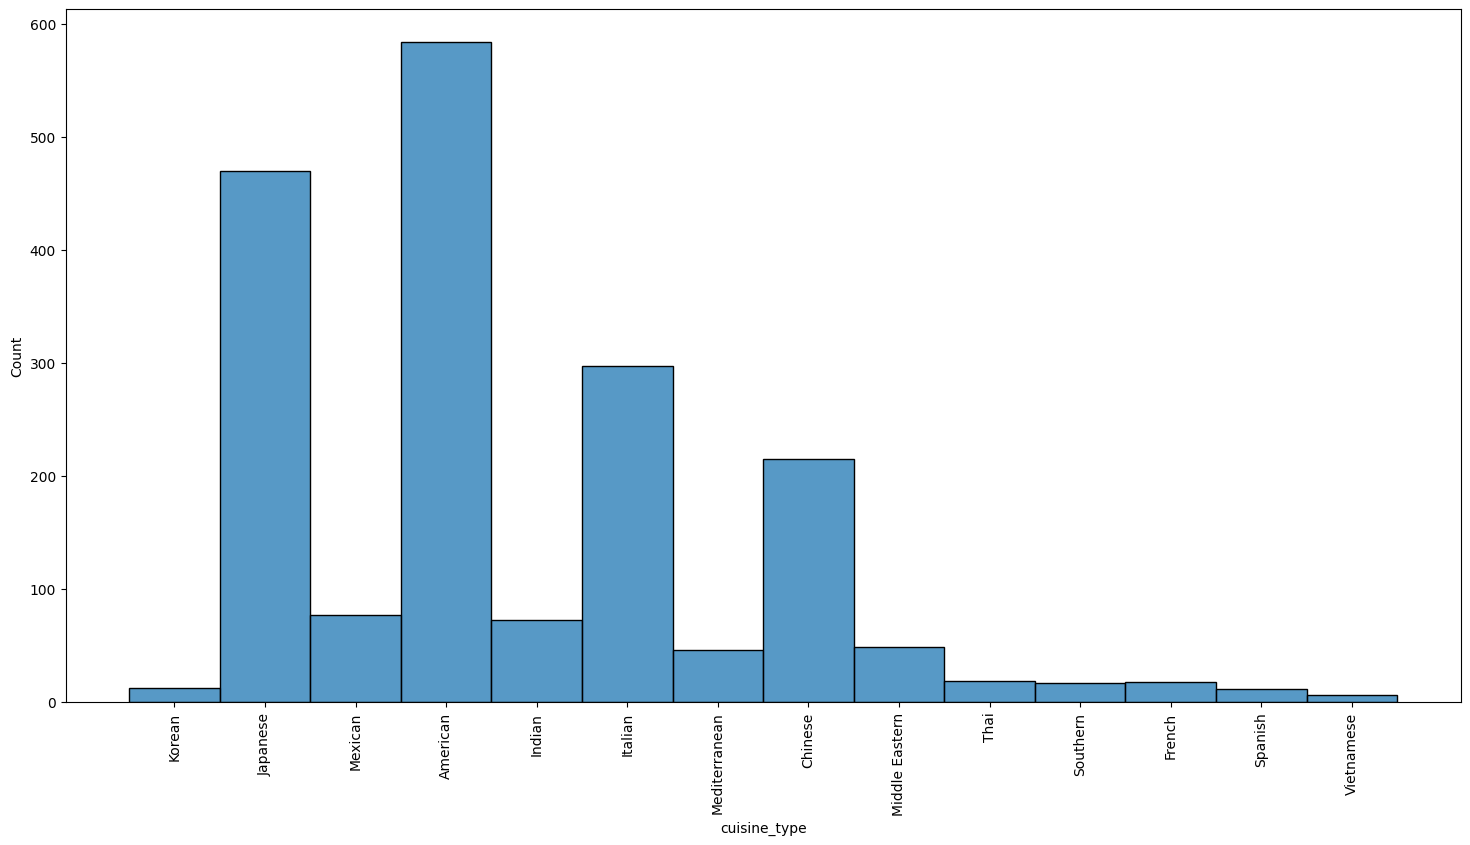

In [22]:
plt.figure(figsize=(18, 9));
sns.histplot(data = df, x ="cuisine_type")
plt.xticks(rotation = 90);



<Axes: xlabel='restaurant_name', ylabel='count'>

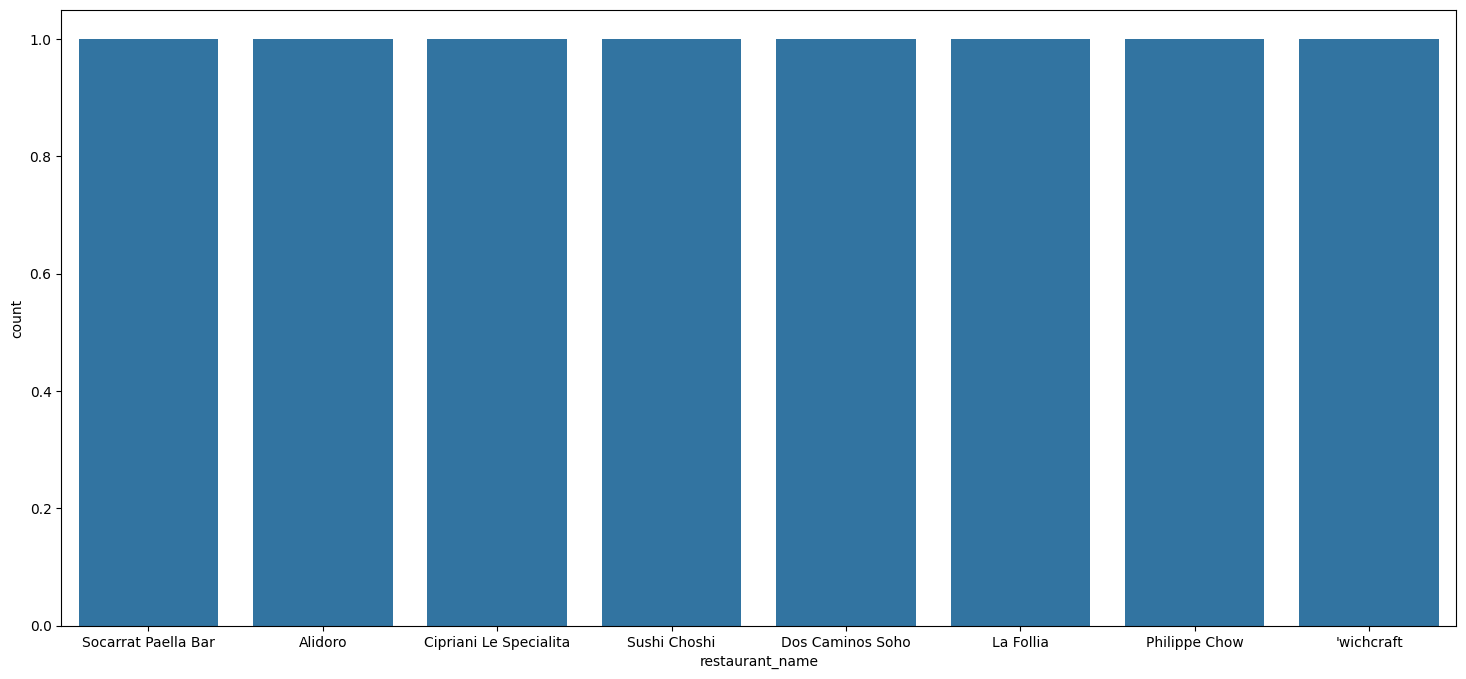

In [23]:
plt.subplots(figsize = (18,8))
sns.countplot(data = df, x = 'restaurant_name', order = df.restaurant_name.value_counts().iloc[-8:].index)

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

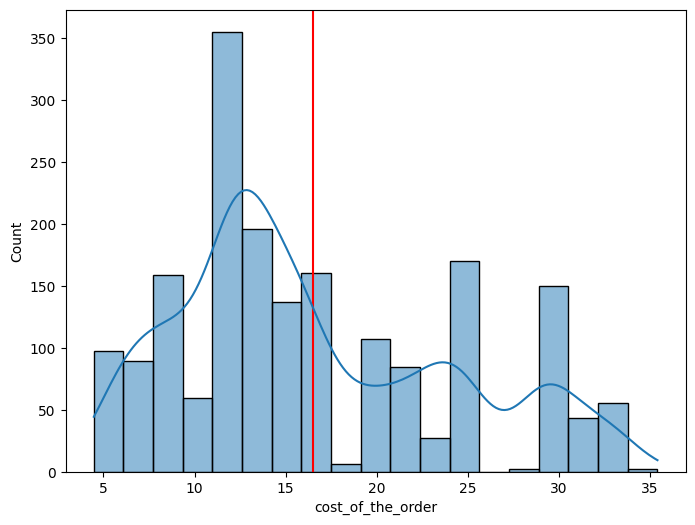

In [24]:
#Histogram displaying cost_of_the_order using the mean.
plt.figure(figsize = (8,6))
plt.axvline(df['cost_of_the_order'].mean(), color='r')
sns.histplot(data = df, x = 'cost_of_the_order', kde = True)


<Axes: xlabel='cost_of_the_order', ylabel='Count'>

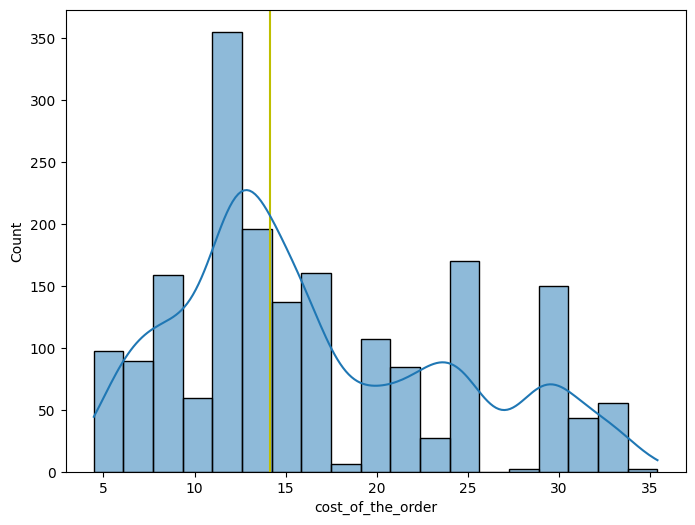

In [25]:

#Histogram displaying cost_of_the_order using the median.
plt.figure(figsize = (8,6))
plt.axvline(df['cost_of_the_order'].median(), color='y')
sns.histplot(data = df, x = "cost_of_the_order", kde = True)

<Axes: xlabel='cost_of_the_order'>

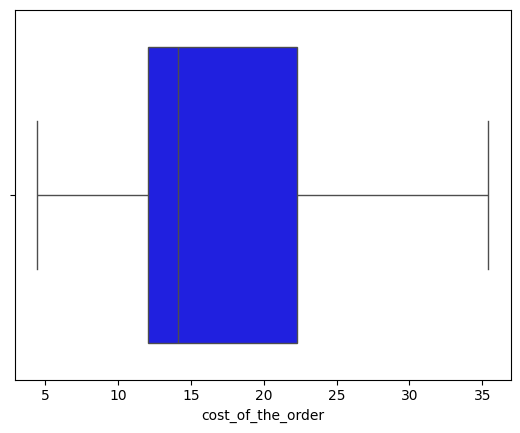

In [26]:
#Boxplot displaying the medium
sns.boxplot(data = df, x = 'cost_of_the_order', color="blue")

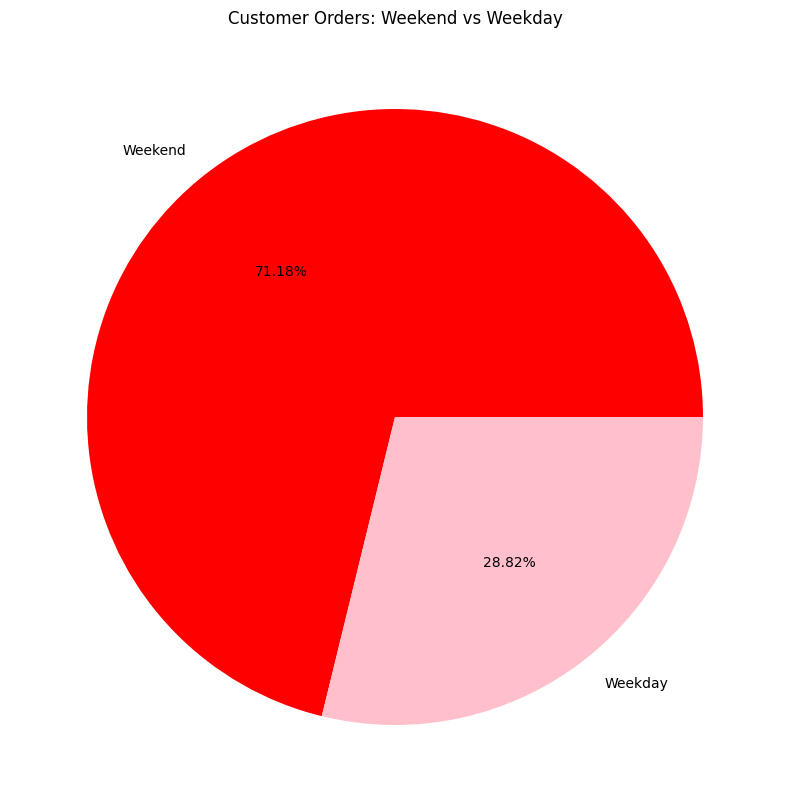

In [27]:
# pie plot displaying the fequency of orders per week
plt.figure(figsize=( 10,10))
df["day_of_the_week"].value_counts().plot(kind="pie",autopct="%.2f%%", colors=["red", "pink"] )
plt.title("Customer Orders: Weekend vs Weekday")
plt.ylabel("")
plt.show()

cost of the order indicatethe mean is greater than the median, which supports that the kde is right skewed.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?



In [28]:
df['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
 The most popular restuarant is Shake Shake the least poper is Parm

### **Question 8**: Which is the most popular cuisine on weekends?

In [29]:
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean             11
                 Southern           11
                 Spanish            11
                 Vietnamese          4
Name: count, dtype: int64

#### Observations: Customers like American cuisine the most. 169 customers like Ameican food on the weekday and 415 like american food on weekend.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [30]:
# extract data that haveo orders more than 20 orders
cost_more_than_20 = df[df["cost_of_the_order"] > 20]

# From the data that is extracted, find the count of how many of these orders
# are greater than 20
orders_more_than_20 = len(cost_more_than_20)

# Calculate the total number of orders
order_sum = len(df)

# percentage arithmetic
percentage = (orders_more_than_20 / order_sum) * 100

# rounnd the percentage
percentage = round(percentage)
print(percentage)

29


#### Observations: 29% of the total orders have a cost more than $20.00


### **Question 10**: What is the mean order delivery time?

In [31]:
mean_dt = df["delivery_time"].mean()
print("Delivery time Mean:", round(mean_dt))

Delivery time Mean: 24


#### Observations: Mean delivery time is appoximaitly 24 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [32]:
# head() appended with value_counts() with print out the customer ids of the tope 3 most frewuent customers
df['customer_id'].value_counts().head(3)


,count
customer_id,
52832,13
47440,10
83287,9


In [33]:
#  displaying  sum of customers that are top 3
df['customer_id'].value_counts().head(3).sum()


32

#### Observations: the  total numnber of customer that frequently dine and are the top 3 are 32 customers.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

In [34]:
df['customer_id'].value_counts().head(3)



,count
customer_id,
52832,13
47440,10
83287,9


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

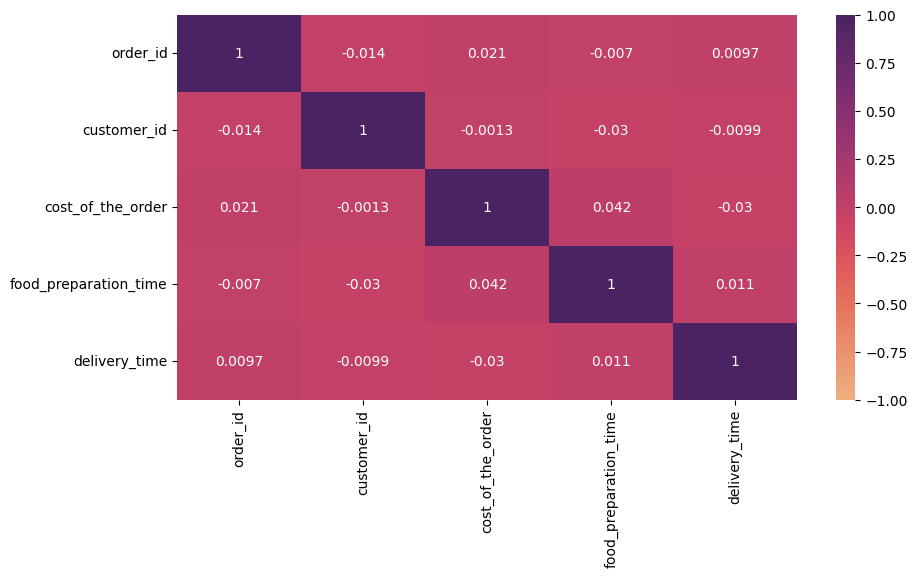

In [42]:
# Write the code here
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="flare", vmin=-1,vmax=1)
plt.show()


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [44]:
df_update = df.drop(df.index[(df['rating'] != '3') & (df['rating'] != '4') & (df['rating'] != '5')])
df_update['restaurant_name'].value_counts()>50

,count
restaurant_name,
Shake Shack,True
The Meatball Shop,True
Blue Ribbon Sushi,True
Blue Ribbon Fried Chicken,True
RedFarm Broadway,False
...,...
Philippe Chow,False
Dirty Bird To Go (archived),False
The MasalaWala,False


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

#### Observations: The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken are restrautrants that take more than 60 min for delivery i.e time the order is recieve then start of delivery time.


In [45]:
total = 0
for i in df['cost_of_the_order']:
    if (i > 20):
        total = total + (i*0.25)
    elif (5 < i < 20):
        total = total + (i*0.15)
    else:
        totla = total + (i*0)
print('Total revenue:', "{:.2f}".format(total))

Total revenue: 6166.30


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [46]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations: mean delivery time is greater on the weekdays than weekend, need more data support this observation.



 Need more data to analyze this observed trend



### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)



## Conclusion: Customer's use the FoodHub app to place orders during the weekend. Cusotmers's favorite cuisine is American. Utilizing graphical reprensnenation , cost of the order is right skewed, showing that most orders are low at cost. 71% of customer are less than equal to $20.00.





## Recommendations:  A initiative should be made Increase the number of orders that have ratings. THus will isolalte the varibles of cuisine preference, delivery time, and qualitiy is the factor that is affecting the number of orders. There must be a plan to increase the number of orders on the weekday which affect the profit. There should be wild-card disccunts on during the weekday, The numbers times to this should be determine from revenue data. THis could of affect order volume on during weedays. The app should have a benefit,or bonus aspect for the customers so it would increase the motive to use it and increase sales of orders.